In [34]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import math
from math import*
from numpy import log as ln
import sklearn
import pandas as pd
%matplotlib inline

In [44]:
data = pd.read_csv('sequences.csv', encoding='utf-8', sep=',')
data

,Accession,Release_Date,Species,Genus,Family,Length,Nuc_Completeness,Genotype,Genome_Region,Segment,Authors,Publications,Geo_Location,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,NC_045512,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29903,RefSeq,NaN,NaN,NaN,"Wu,F., Zhao,S., Yu,B., Chen,Y.-M., Wang,W., Hu...",NaN,China,Homo sapiens,NaN,2019-12,NaN,Severe acute respiratory syndrome coronavirus ...
1,MT263381,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29910,GenBank,NaN,NaN,NaN,"Roychoudhury,P., Greninger,A., Jerome,K.",NaN,USA,Homo sapiens,NaN,2020-03-23,NaN,Severe acute respiratory syndrome coronavirus ...
2,MT263382,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29900,GenBank,NaN,NaN,NaN,"Roychoudhury,P., Greninger,A., Jerome,K.",NaN,USA,Homo sapiens,NaN,2020-03-23,NaN,Severe acute respiratory syndrome coronavirus ...
3,MT263383,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29797,GenBank,NaN,NaN,NaN,"Roychoudhury,P., Greninger,A., Jerome,K.",NaN,USA,Homo sapiens,NaN,2020-03-24,NaN,Severe acute respiratory syndrome coronavirus ...
4,MT263384,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29793,GenBank,NaN,NaN,NaN,"Roychoudhury,P., Greninger,A., Jerome,K.",NaN,USA,Homo sapiens,NaN,2020-03-23,NaN,Severe acute respiratory syndrome coronavirus ...
5,MT263385,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29610,GenBank,NaN,NaN,NaN,"Roychoudhury,P., Greninger,A., Jerome,K.",NaN,USA,Homo sapiens,NaN,2020-03-23,NaN,Severe acute respiratory syndrome coronavirus ...
6,MT263386,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29808,GenBank,NaN,NaN,NaN,"Roychoudhury,P., Greninger,A., Jerome,K.",NaN,USA,Homo sapiens,NaN,2020-03-22,NaN,Severe acute respiratory syndrome coronavirus ...
7,MT263387,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29852,GenBank,NaN,NaN,NaN,"Roychoudhury,P., Greninger,A., Jerome,K.",NaN,USA,Homo sapiens,NaN,2020-03-23,NaN,Severe acute respiratory syndrome coronavirus ...
8,MT263388,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29740,GenBank,NaN,NaN,NaN,"Roychoudhury,P., Greninger,A., Jerome,K.",NaN,USA,Homo sapiens,NaN,2020-03-23,NaN,Severe acute respiratory syndrome coronavirus ...
9,MT263389,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29454,GenBank,NaN,NaN,NaN,"Roychoudhury,P., Greninger,A., Jerome,K.",NaN,USA,Homo sapiens,NaN,2020-03-23,NaN,Severe acute respiratory syndrome coronavirus ...


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 18 columns):
Accession           436 non-null object
Release_Date        436 non-null object
Species             436 non-null object
Genus               436 non-null object
Family              436 non-null object
Length              436 non-null int64
Nuc_Completeness    436 non-null object
Genotype            0 non-null float64
Genome_Region       0 non-null float64
Segment             0 non-null float64
Authors             436 non-null object
Publications        3 non-null float64
Geo_Location        434 non-null object
Host                436 non-null object
Isolation_Source    145 non-null object
Collection_Date     436 non-null object
BioSample           5 non-null object
GenBank_Title       436 non-null object
dtypes: float64(4), int64(1), object(13)
memory usage: 61.4+ KB


### Cleanning dataset

In [46]:
#drop columns full of NaN
data = data.drop(['Genotype', 'Genome_Region', 'Segment', 'Publications', 'BioSample' ],axis='columns' )
data

,Accession,Release_Date,Species,Genus,Family,Length,Nuc_Completeness,Authors,Geo_Location,Host,Isolation_Source,Collection_Date,GenBank_Title
0,NC_045512,2020-01-13T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29903,RefSeq,"Wu,F., Zhao,S., Yu,B., Chen,Y.-M., Wang,W., Hu...",China,Homo sapiens,NaN,2019-12,Severe acute respiratory syndrome coronavirus ...
1,MT263381,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29910,GenBank,"Roychoudhury,P., Greninger,A., Jerome,K.",USA,Homo sapiens,NaN,2020-03-23,Severe acute respiratory syndrome coronavirus ...
2,MT263382,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29900,GenBank,"Roychoudhury,P., Greninger,A., Jerome,K.",USA,Homo sapiens,NaN,2020-03-23,Severe acute respiratory syndrome coronavirus ...
3,MT263383,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29797,GenBank,"Roychoudhury,P., Greninger,A., Jerome,K.",USA,Homo sapiens,NaN,2020-03-24,Severe acute respiratory syndrome coronavirus ...
4,MT263384,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29793,GenBank,"Roychoudhury,P., Greninger,A., Jerome,K.",USA,Homo sapiens,NaN,2020-03-23,Severe acute respiratory syndrome coronavirus ...
5,MT263385,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29610,GenBank,"Roychoudhury,P., Greninger,A., Jerome,K.",USA,Homo sapiens,NaN,2020-03-23,Severe acute respiratory syndrome coronavirus ...
6,MT263386,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29808,GenBank,"Roychoudhury,P., Greninger,A., Jerome,K.",USA,Homo sapiens,NaN,2020-03-22,Severe acute respiratory syndrome coronavirus ...
7,MT263387,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29852,GenBank,"Roychoudhury,P., Greninger,A., Jerome,K.",USA,Homo sapiens,NaN,2020-03-23,Severe acute respiratory syndrome coronavirus ...
8,MT263388,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29740,GenBank,"Roychoudhury,P., Greninger,A., Jerome,K.",USA,Homo sapiens,NaN,2020-03-23,Severe acute respiratory syndrome coronavirus ...
9,MT263389,2020-03-31T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29454,GenBank,"Roychoudhury,P., Greninger,A., Jerome,K.",USA,Homo sapiens,NaN,2020-03-23,Severe acute respiratory syndrome coronavirus ...


### Getting some initial insights from our dataset

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 13 columns):
Accession           436 non-null object
Release_Date        436 non-null object
Species             436 non-null object
Genus               436 non-null object
Family              436 non-null object
Length              436 non-null int64
Nuc_Completeness    436 non-null object
Authors             436 non-null object
Geo_Location        434 non-null object
Host                436 non-null object
Isolation_Source    145 non-null object
Collection_Date     436 non-null object
GenBank_Title       436 non-null object
dtypes: int64(1), object(12)
memory usage: 44.4+ KB


In [37]:
data.describe()

,Length
count,436.000000
mean,24980.316514
std,10904.531534
min,87.000000
25%,29754.000000
50%,29848.500000
75%,29882.000000
max,29945.000000


Until now, 436 nucleotide sequences were registered at ncbi database.
The max sequence lenght reistered was 29945bp and the min was 87bp. It is worth to mention that complete sequencies should provide a lenght >29000bp. 

In [38]:
data_length = data['Length'].between(29000, 29945, inclusive=False)
print ("Complete sequencies:", data_length[data_length==True].count())
print ("Incomplete sequencies:", data_length[data_length==False].count())

Complete sequencies: 363
Incomplete sequencies: 73


### Where sample analysis were performed?

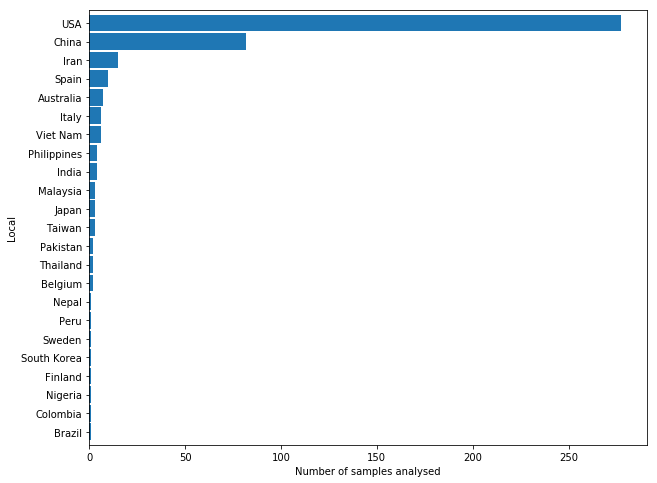

In [56]:
data['Geo_Location'].value_counts().plot('barh', width=0.9, figsize=(10,8)).invert_yaxis()
plt.xlabel('Number of samples analysed')
plt.ylabel('Local')
plt.show()

In [57]:
new_data = data['Geo_Location'].value_counts()
new_data

USA            277
China           82
Iran            15
Spain           10
Australia        7
Italy            6
Viet Nam         6
Philippines      4
India            4
Malaysia         3
Japan            3
Taiwan           3
Pakistan         2
Thailand         2
Belgium          2
Nepal            1
Peru             1
Sweden           1
South Korea      1
Finland          1
Nigeria          1
Colombia         1
Brazil           1
Name: Geo_Location, dtype: int64

In [58]:
data['Geo_Location'].describe()

count     434
unique     23
top       USA
freq      277
Name: Geo_Location, dtype: object

In [59]:
print(data['Geo_Location'].describe().top, 'was the country that performed the most analysis,','counting', data['Geo_Location'].describe().freq, 'nucleotides sequences.' )

USA was the country that performed the most analysis, counting 277 nucleotides sequences.


### Which was the top host?

In [10]:
data['Host'].describe()

count              436
unique               1
top       Homo sapiens
freq               436
Name: Host, dtype: object

In [11]:
data['Host'].value_counts()

Homo sapiens    436
Name: Host, dtype: int64

In [12]:
print(data['Host'].describe().top, 'is the top host identified.')

Homo sapiens is the top host identified.


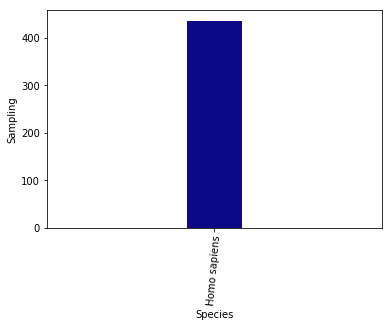

In [13]:
data['Host'].value_counts().plot('bar', colormap='plasma', width=0.1)
plt.xticks(rotation=85)
plt.xlabel('Species')
plt.ylabel('Sampling')
plt.show()

In [14]:
print('Majority of samples were colected in', data['Host'].describe().top)

Majority of samples were colected in Homo sapiens


### Getting info about samples source

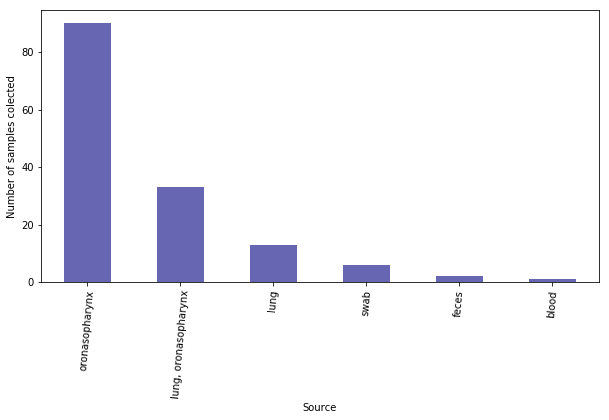

In [15]:
data['Isolation_Source'].value_counts().plot('bar', colormap='jet', width=0.5, alpha=0.6, figsize=(10,5))
plt.xticks(rotation=85)
plt.xlabel('Source')
plt.ylabel('Number of samples colected')
plt.show()

In [16]:
data['Isolation_Source'].value_counts()

oronasopharynx          90
lung, oronasopharynx    33
lung                    13
swab                     6
feces                    2
blood                    1
Name: Isolation_Source, dtype: int64

In [17]:
data['Isolation_Source'].describe()

count                145
unique                 6
top       oronasopharynx
freq                  90
Name: Isolation_Source, dtype: object

Until now, the samples analised were originated from the following sources: **oronasopharynx, lung, swab, feces and blood**. 

In [18]:
print(data['Isolation_Source'].describe().top, 'is the main sample source, counting', data['Isolation_Source'].describe().freq, 'samples')

oronasopharynx is the main sample source, counting 90 samples


In [51]:
print('There is', data['Isolation_Source'].isna().sum(), 'samples without identification source.')

There is 291 samples without identification source.


### When sample were collected?

In [19]:
data['Collection_Date'].describe()

count            436
unique            71
top       2020-03-24
freq              53
Name: Collection_Date, dtype: object

In [20]:
print('First sample was collected in:', data['Collection_Date'].min())
print('Last sample was colected in:', data['Collection_Date'].max())

First sample was collected in: 2019-12
Last sample was colected in: 2020-03-24


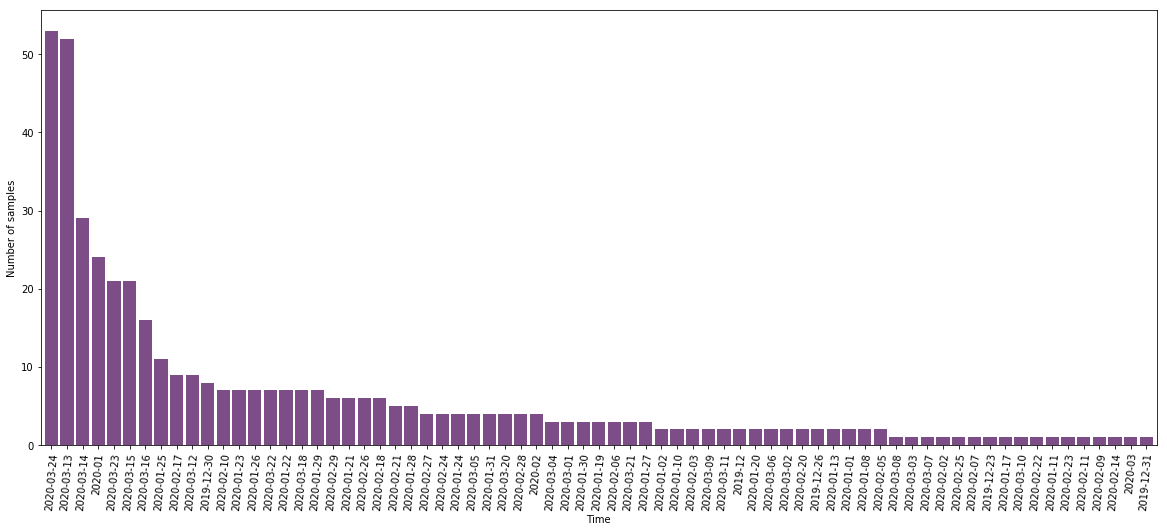

In [21]:
data['Collection_Date'].value_counts().plot('bar', colormap='viridis', width=0.85, alpha=0.7, figsize=(20,8))
plt.xticks(rotation=85)
plt.xlabel('Time')
plt.ylabel('Number of samples')
plt.show()

### When was the database updated for the first and last time?

In [22]:
print('First register in database was in:', data['Release_Date'].min())
print('Last database update was in:', data['Release_Date'].max())

First register in database was in: 2020-01-12T00:00:00Z
Last database update was in: 2020-03-31T00:00:00Z


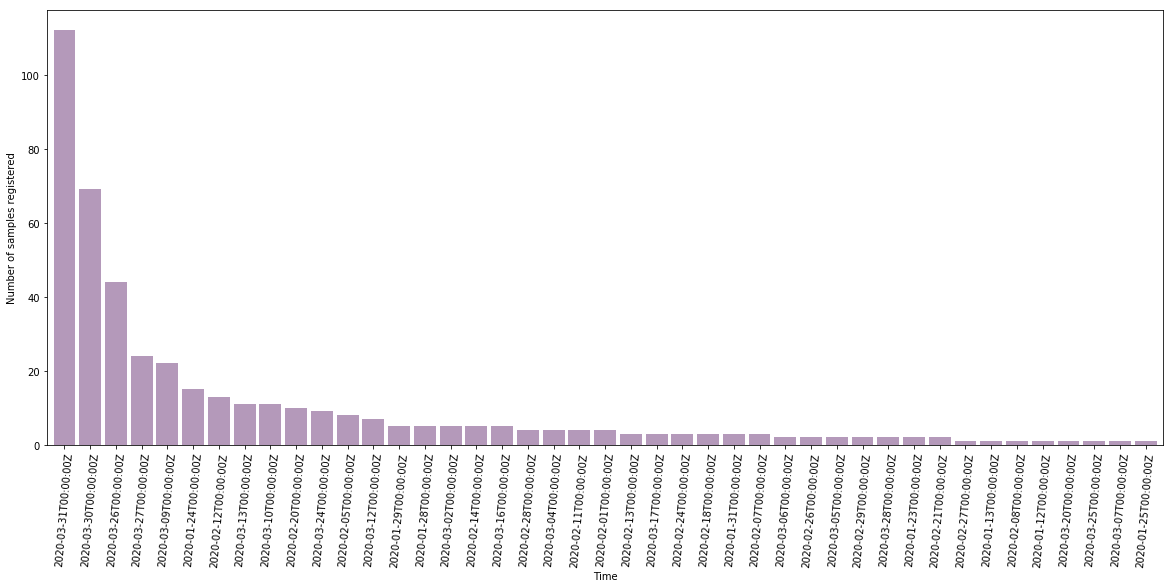

In [60]:
data['Release_Date'].value_counts().plot('bar', colormap='viridis', width=0.85, alpha=0.4, figsize=(20,8))
plt.xticks(rotation=85)
plt.xlabel('Time')
plt.ylabel('Number of samples registered')
plt.show()

### Virus characteristics

In [61]:
data['Family'].describe()

count               436
unique                1
top       Coronaviridae
freq                436
Name: Family, dtype: object

In [62]:
data['Genus'].describe()

count                 436
unique                  1
top       Betacoronavirus
freq                  436
Name: Genus, dtype: object

In [63]:
print ('The virus belongs to the Family',data['Family'].max(), 'and Genus', data['Genus'].max())

The virus belongs to the Family Coronaviridae and Genus Betacoronavirus


In [64]:
print ('The disease is reported by scientific community as',data['Species'].max(),'also known as hCOV or COVID-19')

The disease is reported by scientific community as Severe acute respiratory syndrome-related coronavirus also known as hCOV or COVID-19


### Getting info about authors

In [65]:
data['Authors'].describe()

count                                          436
unique                                          92
top       Roychoudhury,P., Greninger,A., Jerome,K.
freq                                           199
Name: Authors, dtype: object

In [66]:
data['Authors'].value_counts().head()

Roychoudhury,P., Greninger,A., Jerome,K.                                                                                                                                                                                                                           199
Liu,Y., Sun,Z., Chen,J., Wang,X., Yu,H., Li,J., Yu,X., Wang,H., Pan,J.                                                                                                                                                                                              15
Chan,J.F.-W., Yuan,S., Kok,K.H., To,K.K.-W., Chu,H., Yang,J., Xing,F., Liu,J., Yip,C.C.-Y., Poon,R.W.-S., Tsai,H.W., Lo,S.K.-F., Chan,K.H., Poon,V.K.-M., Chan,W.M., Ip,J.D., Cai,J.P., Cheng,V.C.-C., Chen,H., Hui,C.K.-M., Yuen,K.Y., Chan,J.F.W., Yuen,K.-Y.     14
Tao,Y., Zhang,J., Paden,C.R., Queen,K., Uehara,A., Li,Y., Wang,H., Jacobs,J., Russell,D., Hiatt,B., Gant,J., Tong,S.                                                                                               

In [70]:
print('The majority of publications are from', 
      data['Authors'].describe().top, 
      'counting', data['Authors'].describe().freq, 'publications' )

The majority of publications are from Roychoudhury,P., Greninger,A., Jerome,K. counting 199 publications


In [68]:
print('There are', data['Authors'].describe()['count'], 
      'publications, generated by', 
      data['Authors'].describe()['unique'], 
      'research groups')

There are 436 publications, generated by 92 research groups


In [69]:
print('The biggest research group is:', data['Authors'].max())

The biggest research group is: Zhou,P., Yang,X.-L., Wang,X.-G., Hu,B., Zhang,L., Zhang,W., Si,H.-R., Zhu,Y., Li,B., Huang,C.-L., Chen,H.-D., Chen,J., Luo,Y., Guo,H., Jiang,R.-D., Liu,M.-Q., Chen,Y., Shen,X.-R., Wang,X., Zheng,X.-S., Zhao,K., Chen,Q.-J., Deng,F., Liu,L.-L., Yan,B., Zhan,F.-X., Wang,Y.-Y., Xiao,G.-F., Shi,Z.-L., Yang,X.L., Wang,X.G., Si,H.R., Shi,Z.L.
